# Scientific Python Bootcamp Day 2 - Solutions

Prepared and presented by John Russell

### Topics for the day
- Writing of functions 
- Advanced plotting
- Advanced indexing
- Solving differential equations

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#These are some matplot lib configurations that I like to use. 
mpl.rc("text", usetex=False) #if tou have Latex set this to true and matplotlib will render labels in latex
mpl.rc("font", family = "serif") #Serif font in matplotlib
mpl.rc("figure",figsize=(9,6)) #Increase default figure size
%config InlineBackend.figure_format = 'retina' #If you have a high res display, render the plots more nicely
mpl.style.use('dark_background') #Use a dark background for matplotlib figures if youre using dark theme
plt.rcParams.update({"figure.facecolor": "111111",
                     "savefig.facecolor": "212121"})

### Warmup: Plot a function

Make a plot showing the function $ f(x) = e^{-x^2}\sin(x)$ for $-3 \leq x \leq 3$.

In addition to plotting the curve itself, place the equation for $f(x)$ in the title of the graph and label the $x$ and $y$ axes.

**Hints**
- We need a *linearlly spaced* set of points to be our x values.
- Big loops are bad! Can you use numpy to apply this function to all the x values at once

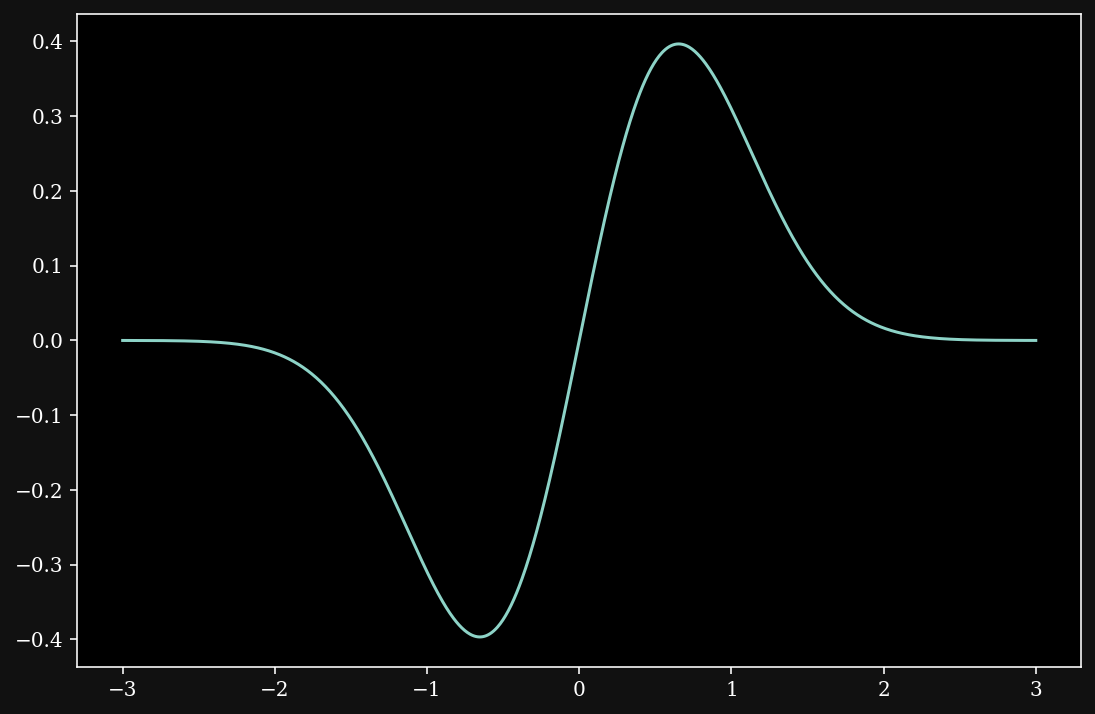

In [3]:
x0 = np.linspace(-3,3,1000)
y0 = np.exp(-x0**2)*np.sin(x0)
plt.plot(x0,y0)
plt.show()

### Making lots of plots

Now lets consider a set of functions characterized by two paramters $a$ and $b$. We can write:

$$f(x;a,b) = e^{-ax^2}\sin(bx).$$

Notice that the last function we plotted was part of this family with $a=b=1$. Plot this function for all combinations of $a=(1,2,3)$ and $b=(1,2,3)$ on the same axes.

*Hints*
- You should make nine plots total (a=1, b=1; a=1, b=2; a=1, b=3; a=2, b=1; ...)

Hopefully you wrote a double loop in the last part to loop over all the values of $a$ and $b$ and plotted the curve inside the loop. Depending on how you did it it probably looked something like this:

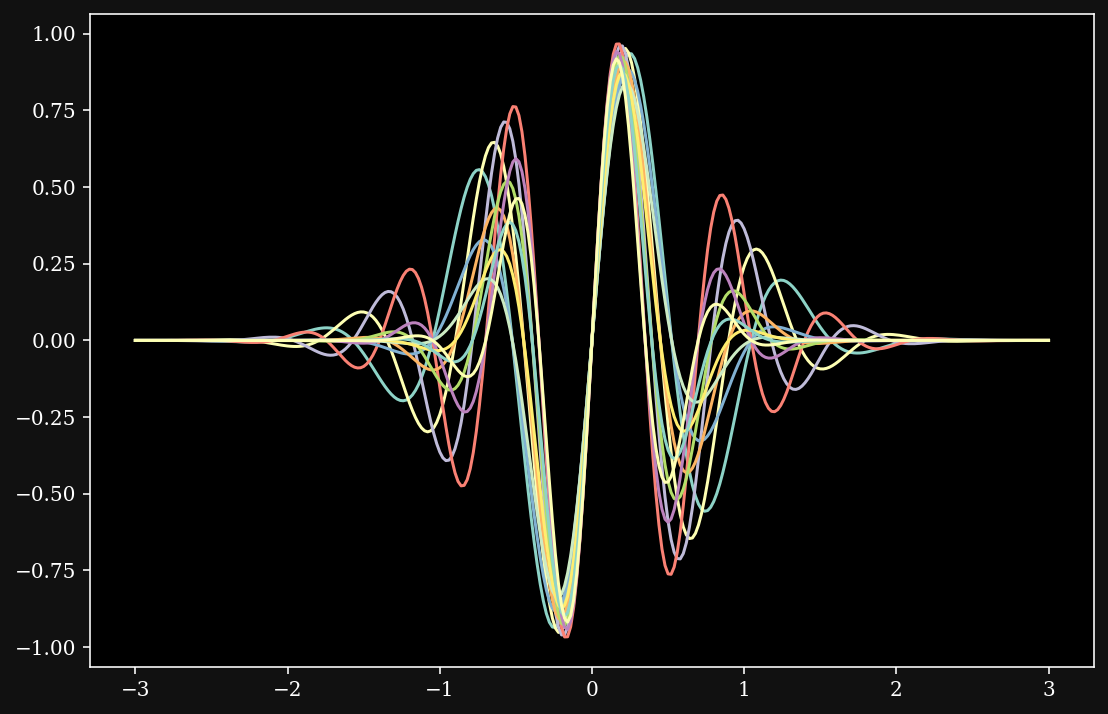

In [4]:
xplt = np.linspace(-3,3,301)
for a in range(1,4):
    for b in range(6,10):
        plt.plot(xplt, np.exp(-a*xplt**2)*np.sin(b*xplt))
plt.show()

- Show that you can interate through lists or arrays i.e `for a in [1,2,3]` or `a in [1.2, 1.8, 2.1, 2.6, 3.0]` 
- Show how to label curves
- Is there a better way to motivate writing functions than this?

### Let's put our function into a python function (seems fitting right?)

In [5]:
#A simple function that takes 2 inputs x and y and *returns* 2x+3y
def my_fxn(x,y):
    z = 2*x+3*y
    return z

In [6]:
my_z = my_fxn(2,6)

In [7]:
#generalize my_fxn to compute ax+by for any a and b
def my_general_fxn(x,y,a,b):
    return a*x+b*y

The functions above do not even scratch the surface of what a function can do. Today we will focus on implementing mathematical functions but in general, functions can do anything that python can do. Good code organizes sensible chunks of work into many smaller functions and then composes high level functionality out of these smaller functions. More on this tomorrow but as a rule of thumb: *if you go to copy paste some of your code a third time, you should turn that piece of code into a function.*

### Exercise

Write a function that takes three arguments `arr`, `odd_mult`, `even_mult`. This function should multiply the odd-indexed elements of `arr` by `odd_mult` and the even-indexed elements by `even_mult`. `arr` will be a one-dimensional array. 

**Bonus** 
- What will happen if we pass a multidimensional array to your function?
- Add an if statement to check that `arr` is only one-dimensional. If it is not print an explanatory error. 

In [8]:
def even_odd_mult(arr, even_mult, odd_mult):
    integers = np.arange(arr.shape[0])
    odd_idx = integers%2==1
    even_idx = integers%2==0
    new_arr = np.zeros_like(arr)
    new_arr[odd_idx] = odd_mult*arr[odd_idx]
    new_arr[even_idx] = even_mult*arr[even_idx]
    return new_arr

In [9]:
even_odd_mult(np.ones(10),2,3)

array([2., 3., 2., 3., 2., 3., 2., 3., 2., 3.])

In [31]:
even_odd_mult(np.ones(9).reshape(3,3),4,5)

array([[4., 4., 4.],
       [5., 5., 5.],
       [4., 4., 4.]])

## Solving Ordinary Differential Equations (ODEs)

In a calculus class you have probably encountered differential equations and learned to solve a small set of them by hand. ODEs are ubiquitous in science and applied math but it is much easier to write down an ODE than it is to solve it. Luckily, tremendous amounts of work have been put into developing computational methods for solving ODEs and luckier still, scipy implements many of the best algorithms so you can use them without knowing the finer points of numerical integration.

Consider the ODE

$$ \frac{dy}{dt} = y(t).$$

We can read this ODE as telling us the slope of the function locally (but not the function value). If we had a function value we could start there, take a small step according to the derivative at that point, then reevaluate the derivative and repeat. This idea is at the core of numerically solving ODEs. 

Also recall from calculus that a complete solution to an ODE requires one to specify the *initial conditions* or initial value of the quanity for which you are solving (here population). These problems are sometimes called *Initial Value Problems* and we use `solve_ivp` which lives in the `scipy.integrate` module.  

In [12]:
from scipy.integrate import solve_ivp 

In [13]:
solve_ivp()

TypeError: solve_ivp() missing 3 required positional arguments: 'fun', 't_span', and 'y0'

In [14]:
def dydt(t,y):
    return y

In [16]:
sol0 = solve_ivp(fun=dydt, t_span=(0,10), y0=np.array([1]))

### A slightly more complicated example

Here is an ODE that can be used to model population growth where there is some resource that eventually limits population size:

$$\frac{dP}{dt} = rP(t) \left[1-P(t)/K\right].$$

In this equation $r$ represents a growth rate and $K$ represents the population limit.  I'll use $r=0.6$ and $K=100$ and solve for $ 0 \leq t \leq 25$ with 500 time points.

In [17]:
#the solver needs to be given the differential equation as a function
def dPdt(t, P):
    return 0.6*P*(1-P/100)

#Lets say the population starts out at 1
P0 = np.array([1]) #the number 1 but make it numpy array

#Also need to specify the time points where we want the function to be solved
t_span = (0,25)
t_eval = np.linspace(t_span[0],t_span[1],500)

In [18]:
sol1 = solve_ivp(dPdt, t_span=t_span, y0=P0, t_eval=t_eval, method='DOP853')

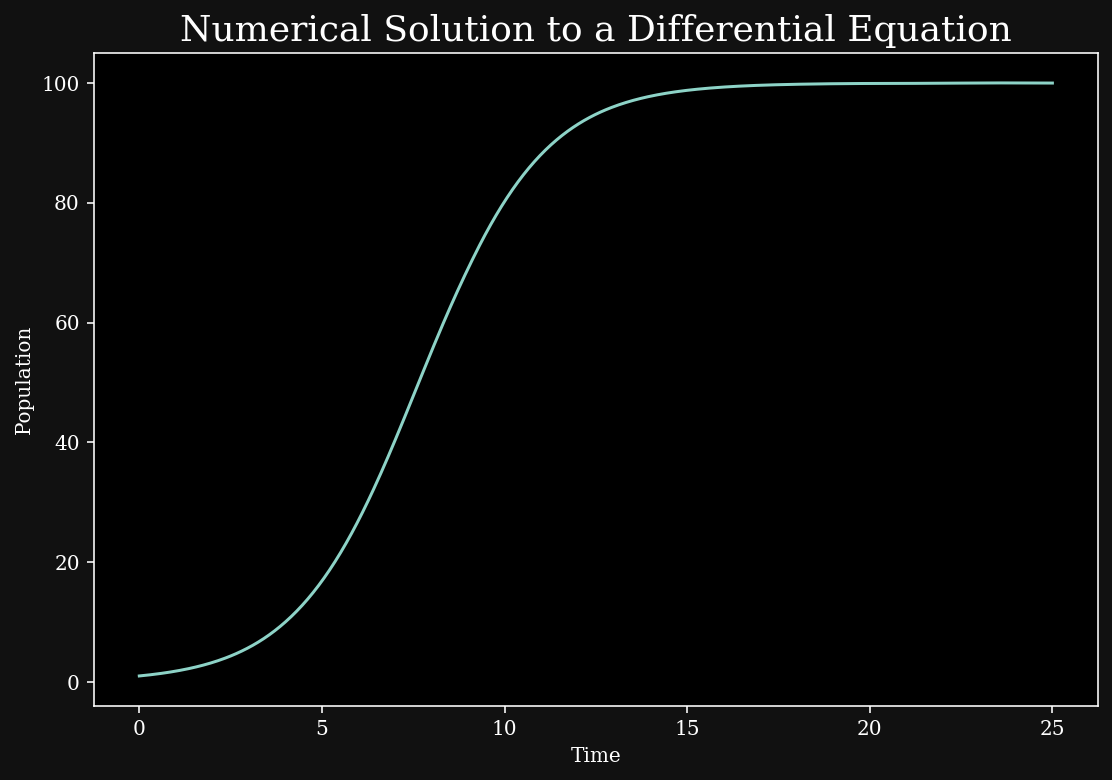

In [19]:
plt.plot(sol1.t,sol1.y[0])
plt.title('Numerical Solution to a Differential Equation',fontsize=18)
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()

### Exercise

Numerically solve the same equation as above but with $(r,K) = (0.6, 80), (0.6, 150), (1.2, 80), (1.2, 150).$ Plot all of the solutions on the same axes and label each curve with its $r$ and $K$ value.

*Hint* One bad way to do this is to define four different derivative functions with each of the different parameter values "hard coded".
Instead you should define a new derivative equation to take $r$ and $k$ as additional arguments. Then have a look at the `solve_ivp` function documentation especially the `args` argument.

In [20]:
def gen_dPdt(t, P, r, K):
    return r*P*(1-P/K)

In [21]:
param_list  = np.array([(0.6, 80), (0.6, 150), (1.2, 80), (1.2, 150)])
solutions = np.zeros(( param_list.shape[0], t_eval.shape[0]))

In [24]:
for i,(r,K) in enumerate(param_list):
    sol = solve_ivp(gen_dPdt, t_span=t_span, y0=P0, t_eval=t_eval,args=(r,K))
    solutions[i] = sol.y

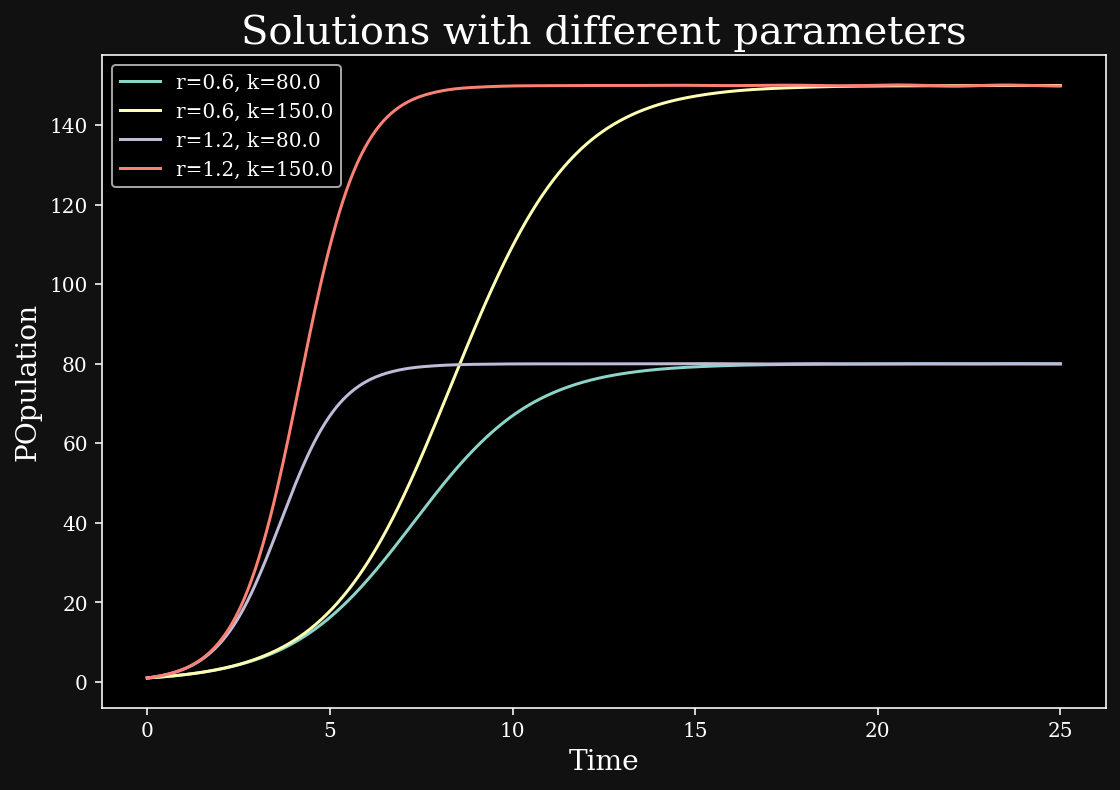

In [32]:
for i,sol in enumerate(solutions):
    plt.plot(t_eval, sol, label = f'r={param_list[i,0]}, k={param_list[i,1]}')
plt.title("Solutions with different parameters", fontsize=20)
plt.xlabel('Time',fontsize=14)
plt.ylabel('POpulation', fontsize=14)
plt.legend()
plt.show()

### Solving Systems of ODEs

Solving single variable ODEs is great and all but a lot of the time we have coupled ODEs. A very famous example is the Lorenz Equations:

$$ \frac{dx}{dt} = \sigma(y-x)$$
$$ \frac{dy}{dt} = x(\rho-z) - y$$
$$ \frac{dz}{dt} = xy- \beta z$$

Scipy's ODE solver can handle such equations. The important thing is that we don't define the derivatives separately. Rather we make an array containing $x,y$, and $z$ and define the derivative function to return an array containing $\frac{dx}{dt}, \frac{dy}{dt}, \text{and} \frac{dz}{dt}$.

In [25]:
def lorenz(t, r, rho, sigma, beta):
    x,y,z = r
    dxdt = sigma*(y-x)
    dydt = x*(rho-z) - y
    dzdt = x*y-beta*z
    return np.array([dxdt, dydt, dzdt])

In [26]:
#use ρ = 28, σ = 10, and β = 8/3
init_vals = np.array([1,1,1])
lorenz_sol = solve_ivp(lorenz, (0,100), init_vals, t_eval = np.linspace(0,100,50000), args=(28, 10, 8/3))

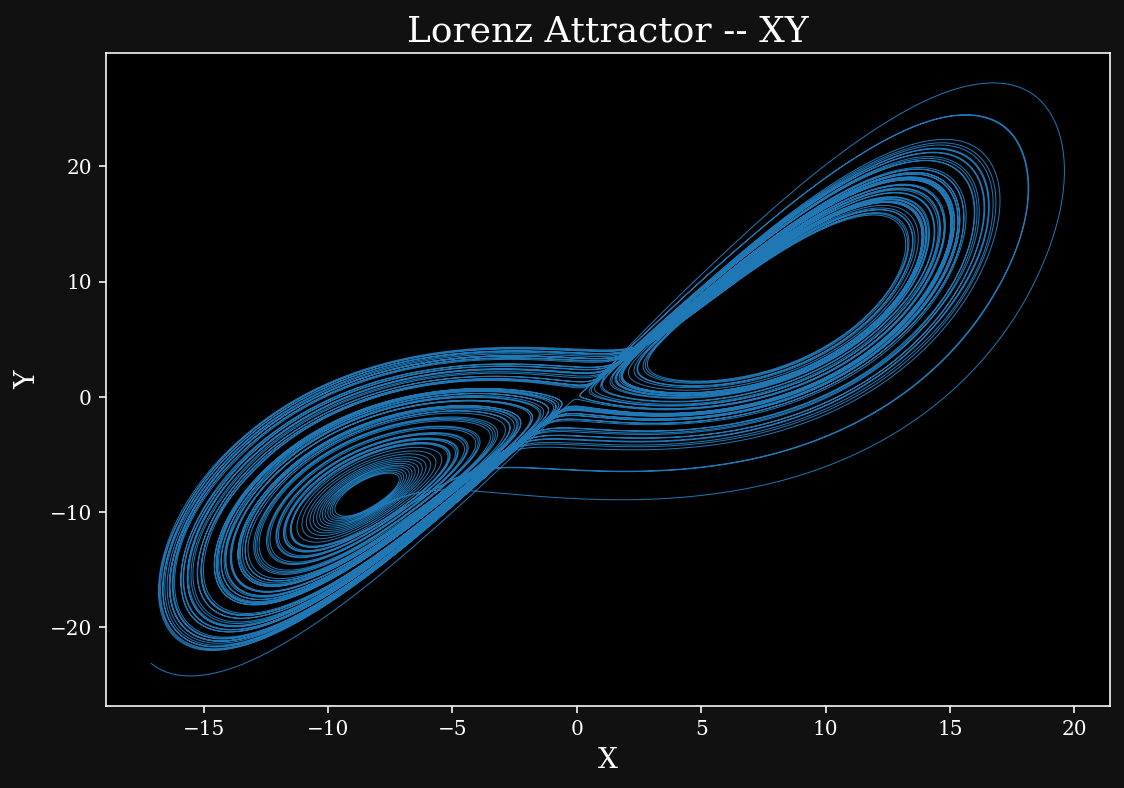

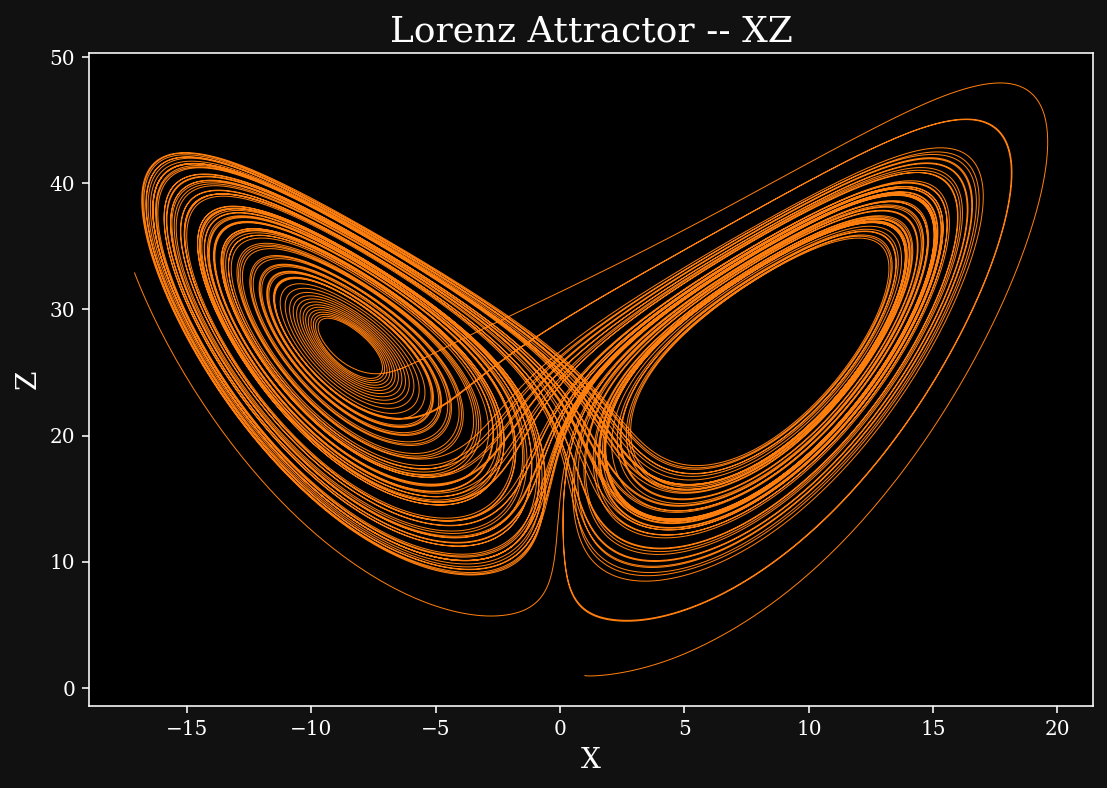

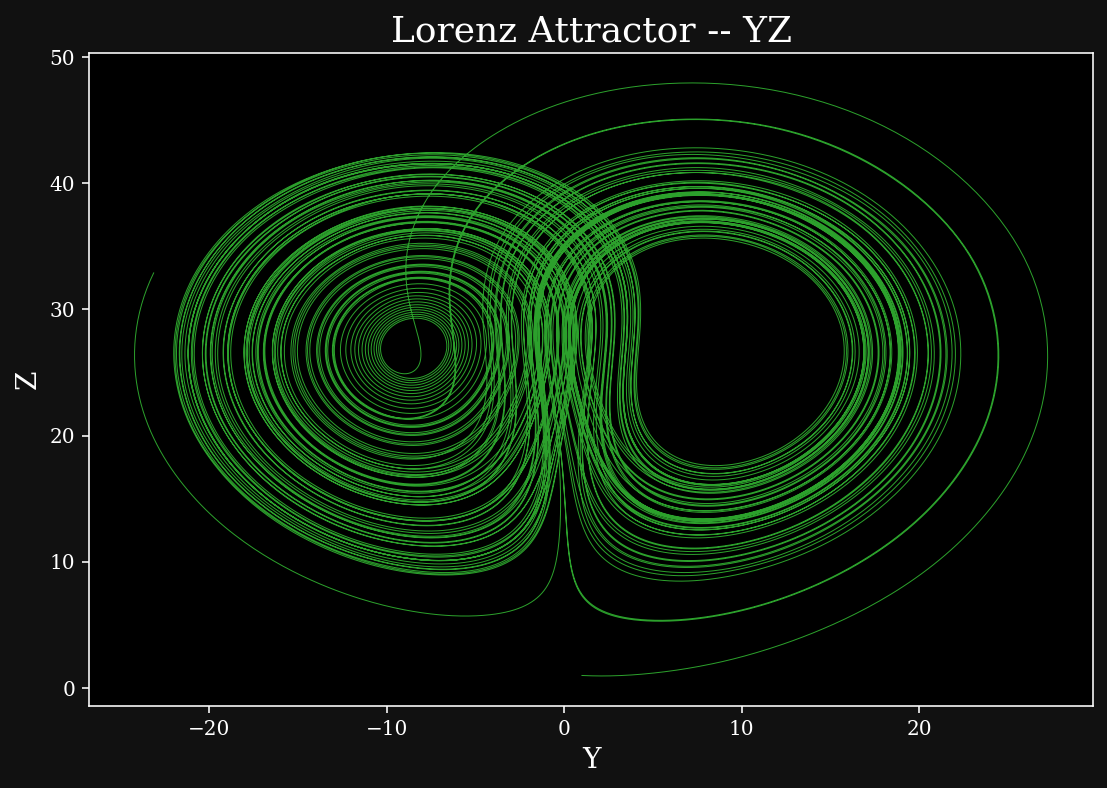

In [27]:
#dark_bkgd_colors = plt.rcParams['axes.prop_cycle']

# Yes Im breaking the when to write a function rule of thumb here but 
plt.plot(lorenz_sol.y[0], lorenz_sol.y[1], linewidth=0.5, c='tab:blue')
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title(r'Lorenz Attractor -- XY', fontsize=18)
plt.show()
plt.plot(lorenz_sol.y[0], lorenz_sol.y[2], linewidth=0.5, c='tab:orange')
plt.xlabel('X', fontsize=14)
plt.ylabel('Z', fontsize=14)
plt.title(r'Lorenz Attractor -- XZ', fontsize=18)
plt.show()
plt.plot(lorenz_sol.y[1], lorenz_sol.y[2], linewidth=0.5, c='tab:green')
plt.xlabel('Y', fontsize=14)
plt.ylabel('Z', fontsize=14)
plt.title(r'Lorenz Attractor -- YZ', fontsize=18)
plt.show()


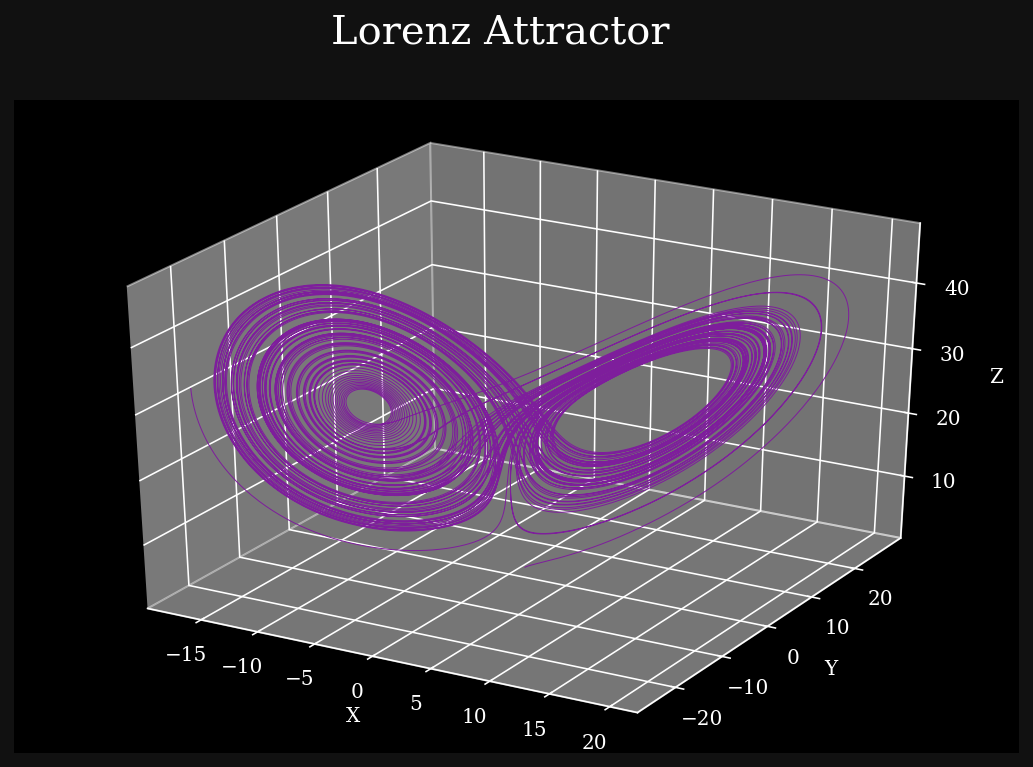

In [28]:
# Probably beyond the scope of this bootcamp but just to show you that its possible
#I google "matplotlib 3d plot example" every single time I do this
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.suptitle(r"Lorenz Attractor", fontsize=20)
ax.plot(lorenz_sol.y[0],lorenz_sol.y[1],lorenz_sol.y[2], linewidth=0.5,c='xkcd:purple')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

### Exercise: Rabbits and foxes

Consider a model for a population of rabbits and a population of foxes that live in the same area. The equations for the number of rabbits and foxes at any given time are:

$$ \frac{dR}{dt} = aR(1-R/R_{max}) - bRF$$
$$ \frac{dF}{dt} = -cF + dRF$$

Solve this system of differential equations with $a = 1.5, b = 1, c=0.5, d =  0.3,$ and  $R_{max}=200$. Generate a solution for times $0 \leq t \leq 100$ and evaluate it at 5000 time points Lets say there are initially 20 rabbits and 5 foxes. Make two plots of the solution:
1. R(t) and F(t) on the same axes. Use a title and label each curve.
2. R on the horizontal axis and F on the vertical axis

In [33]:
def rabbits_and_foxes(t, P, a, b, c, d,Rmax):
    R, F = P
    dRdt = a*R*(1-R/Rmax) - b*R*F
    dFdt = -c*F+d*R*F
    return np.array([dRdt,dFdt])

In [35]:
rf_sol = solve_ivp(rabbits_and_foxes, t_span=(0,100),y0=[20,5], t_eval=np.linspace(0,100,5000), args = (1.5,1.0,5,0.3,200))

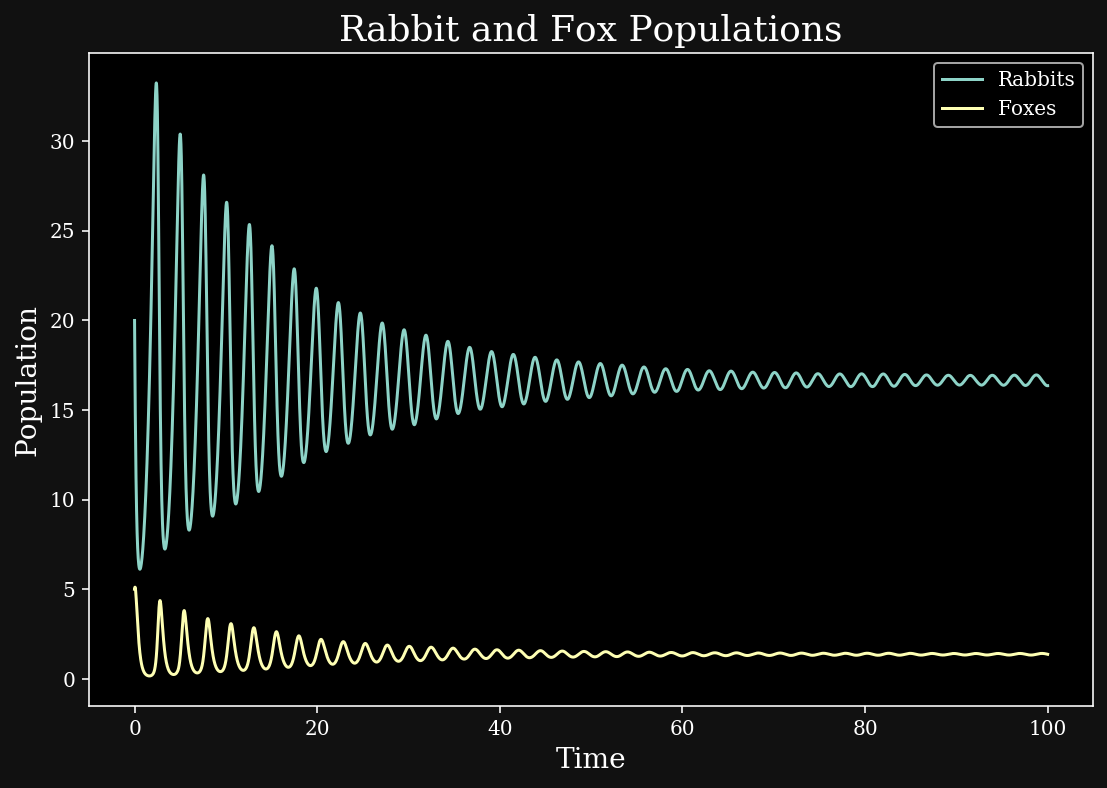

In [39]:
plt.plot(rf_sol.t,rf_sol.y[0],label='Rabbits')
plt.plot(rf_sol.t,rf_sol.y[1],label='Foxes')
plt.title("Rabbit and Fox Populations", fontsize=18)
plt.legend()
plt.xlabel('Time',fontsize=14)
plt.ylabel('Population',fontsize=14)
plt.show()

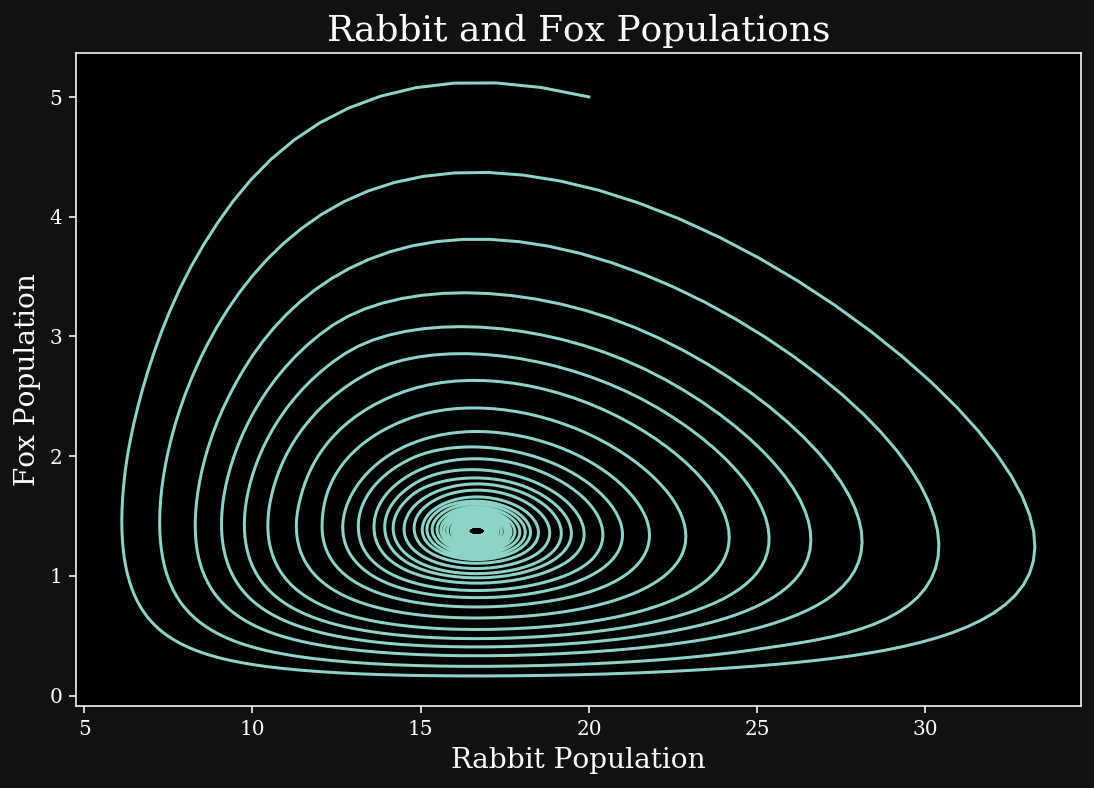

In [40]:
plt.plot(rf_sol.y[0], rf_sol.y[1])
plt.title("Rabbit and Fox Populations", fontsize=18)
plt.xlabel('Rabbit Population',fontsize=14)
plt.ylabel('Fox Population',fontsize=14)
plt.show()

--------------- This is as far as we got in the actual bootcamp session.-------------------------

I would strongly recommend looking at the next section. The final application is just for fun.

### A mathematical trick that is crucial to numerically solving ODEs

So far we have only considered **First Order** ODEs, that is the highest derivative of each function that appears in any of the equations in the first derivative. It would seem at first blush that `solve_ivp` does not support solving higher order ODEs. While technically true, there is a workaround.

Lets consider the second order ODE 

$$ \frac{d^2x}{dt^2} + 2 \gamma \frac{dx}{dt} + x = 0.$$

This is the equation of motion (i.e. $F=ma$ for the physicists) of a mass attached to a spring and also experiencing friction as it moves, I've rewritten it compared to what you would probably write but thats just to have fewer constants floating around.

**The Trick**

We have seen that `solve_ivp` has no problem with systems of differential equations so we will introduce a new variable to rewrite the second order equation as two first order equations. This may seem crazy but consider a new variable $ v = \frac{dx}{dt}$. We can then rewrite the differential equation above as

$$ \frac{dv}{dt} + 2 \gamma v + x = 0$$
$$ \frac{dx}{dt} = v.$$

Note that we now need to supply initial conditions for both $x$ and $v$.

To use `solve_ivp` we combine $x$ and $v$ into a vector which we represent with an array.

$y = (x,v).$


### Exercise:
Solve the second order ODE above for $\gamma = 0.1, 0.5, 1.5$ with intial values $x(0) = 1$ and $v(0) = 2.$ Solve it for $0 \leq t \leq 50$ with 1000 time points. Plot $x(t)$ for each gamma value on the same axes.

In [41]:
def damped_oscillator(t,y,gamma):
    x,v = y
    dxdt = v
    dvdt = -2*gamma*v-x
    return np.array([dxdt,dvdt])

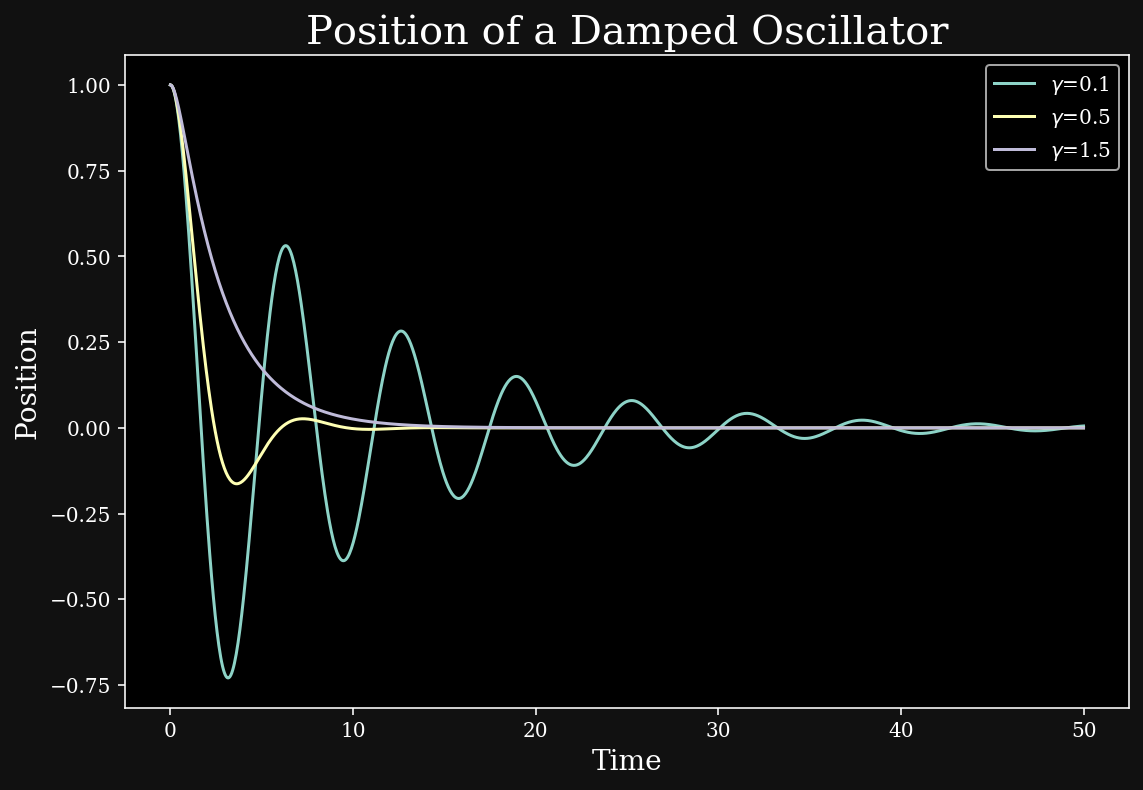

In [46]:
y0 = [1,0]
t_span = (0,50)
t_eval = np.linspace(t_span[0],t_span[1],1000)

for gamma in [0.1, 0.5, 1.5]:
    damped_osc_sol = solve_ivp(damped_oscillator,t_span,y0,t_eval=t_eval,args=(gamma,))
    plt.plot(damped_osc_sol.t,damped_osc_sol.y[0],label=f"$\gamma$={gamma:0.1f}")
plt.title('Position of a Damped Oscillator',fontsize=20)
plt.xlabel('Time',fontsize=14)
plt.ylabel('Position', fontsize=14)
plt.legend()
plt.show()

### Final problem: putting it all together

Consider an [elastic pendulum](https://en.wikipedia.org/wiki/Elastic_pendulum), that is a mass hanging from a spring and swinging back and forth. To fully describe the motion it is convenient to consider $\ell$ the distance along the spring the mass has been moved to and $\theta$ the angular position of the spring. Do not worry if you dont understand these equations, we just want to practice translating math into code.

$$ \frac{d^2\ell}{dt^2} = \ell\left(\frac{d\theta}{dt}\right)^2 + 1 - \ell + \cos \theta$$
$$ \frac{d^2\theta}{dt^2} = -\frac{1}{\ell}\left( \sin \theta + 2 \frac{d\ell}{dt} \frac{d\theta}{dt}\right).$$

Introduce variables $v = \frac{d\ell}{dt}$ and $w = \frac{d\theta}{dt}$ and solve the system of differential equations numerically with the initial condition $\ell(0) = 2$, $v(0) = 0$, $\theta(0) = 1.5$, and $w(0) = 0.5$. Then make plots showing

1. $\theta(t)$ and $\ell(t)$ on separate graphs
1. $x(t)$, $y(t)$  on the same graph using $ x= \ell \sin \theta$ and $y = -\ell \cos \theta$
1.  $y$ vs. $x$

Add titles, labels, and axis labels as appropriate.


In [47]:
def elastic_pendulum(t,y):
    L, v, theta, w = y
    dLdt = v
    dvdt = L*w**2+ 1-L+ np.cos(theta)
    dthetadt = w
    dwdt = (-1/L)*(np.sin(theta)+2*w*v)
    return np.array([dLdt,dvdt,dthetadt,dwdt])

In [48]:
elastic_pendulum_sol = solve_ivp(elastic_pendulum,(0,100),y0=[2,0,1.5,0.5],t_eval=np.linspace(0,100,10000))

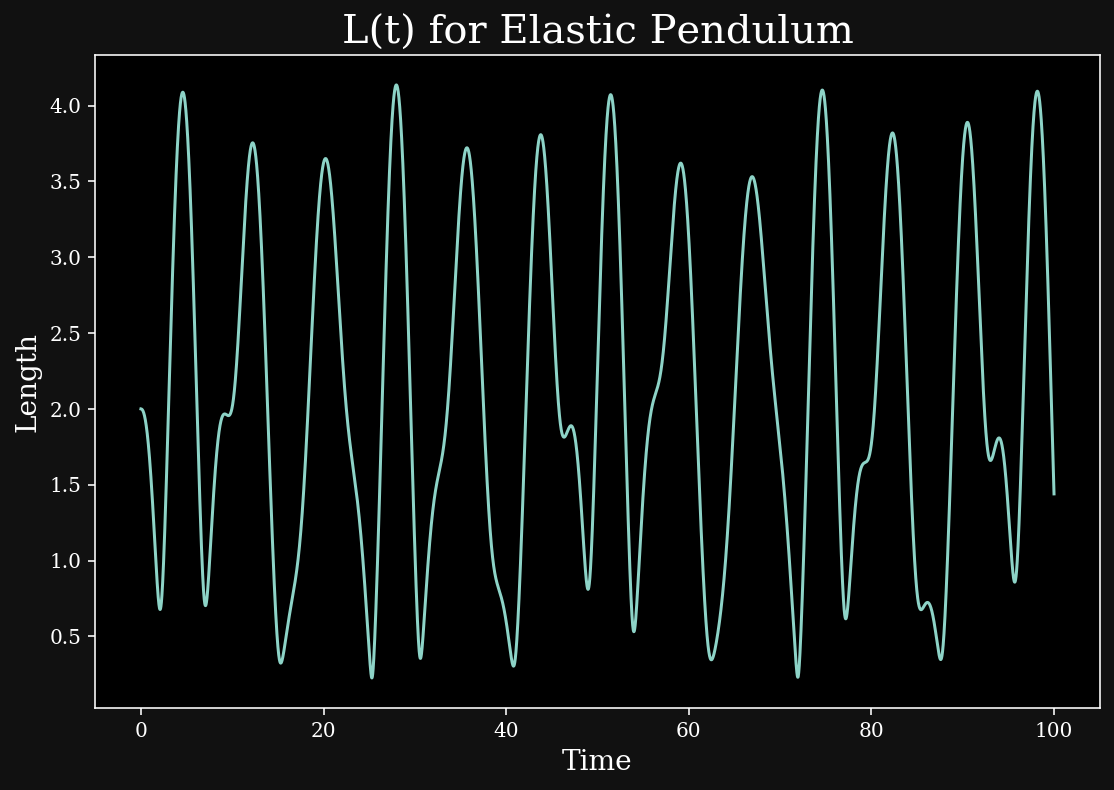

In [58]:
plt.plot(elastic_pendulum_sol.t,elastic_pendulum_sol.y[0])
plt.title("L(t) for Elastic Pendulum",fontsize=20)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Length', fontsize=14)
plt.show()

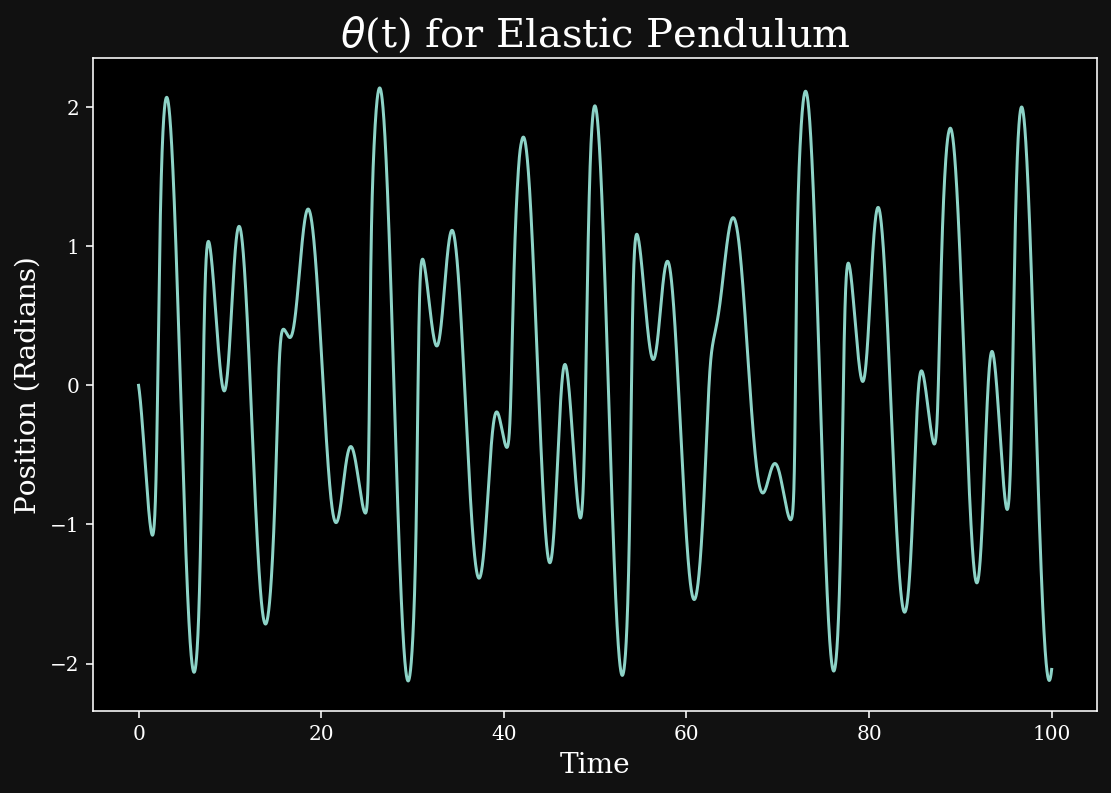

In [62]:
plt.plot(elastic_pendulum_sol.t,elastic_pendulum_sol.y[1])
plt.title(r"$\theta$(t) for Elastic Pendulum",fontsize=20)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Position (Radians)', fontsize=14)
plt.show()

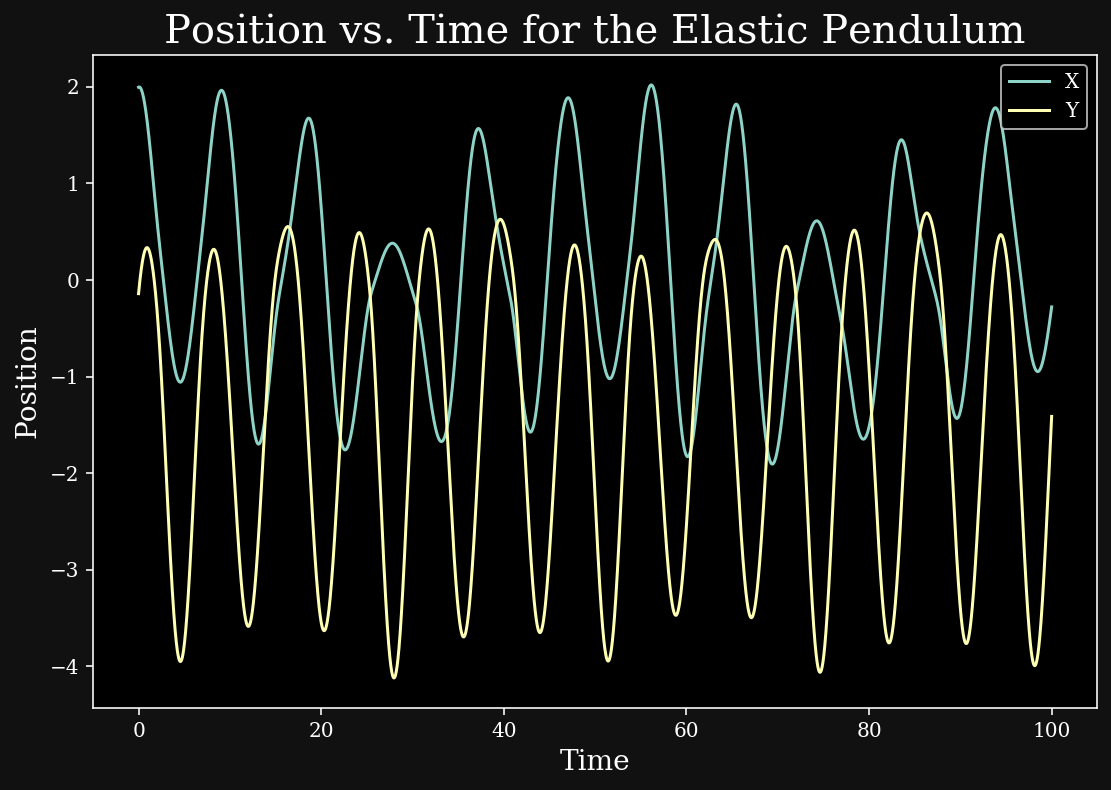

In [52]:
plt.title('Position vs. Time for the Elastic Pendulum', fontsize=20)
plt.plot(elastic_pendulum_sol.t,X,label="X")
plt.plot(elastic_pendulum_sol.t,Y,label="Y")
plt.xlabel('Time', fontsize=14)
plt.ylabel('Position', fontsize=14)
plt.legend()
plt.show()

In [49]:
X = elastic_pendulum_sol.y[0]*np.sin(elastic_pendulum_sol.y[2])
Y = -elastic_pendulum_sol.y[0]*np.cos(elastic_pendulum_sol.y[2])

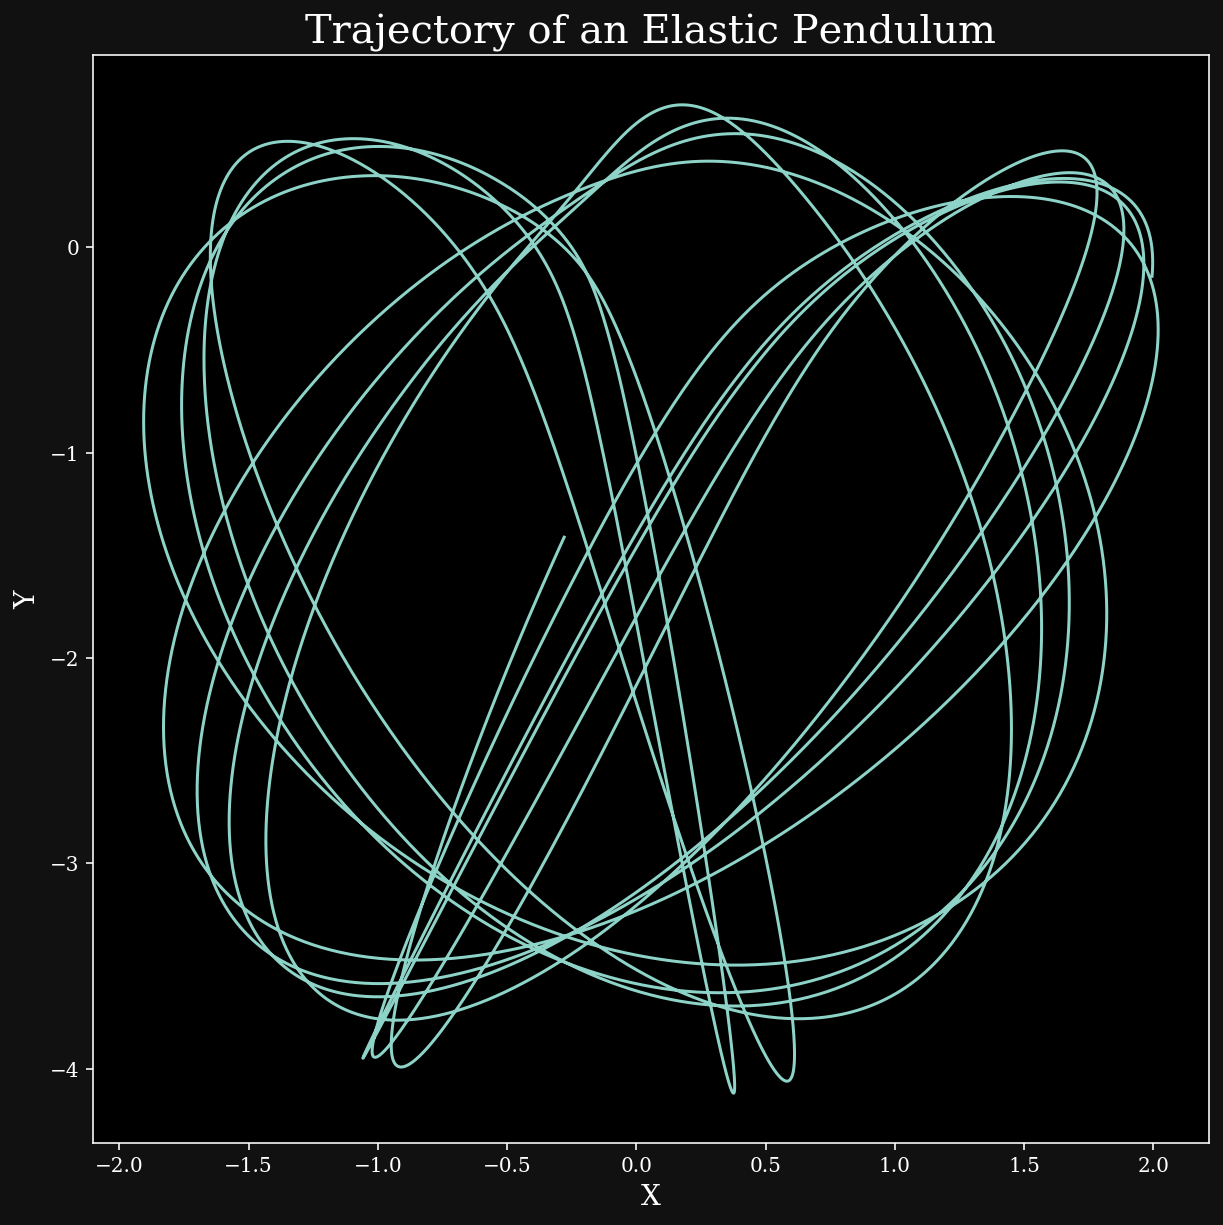

In [53]:
plt.figure(figsize = (10,10))
plt.plot(X, Y)
plt.title("Trajectory of an Elastic Pendulum",fontsize=20)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.show()

If you want to see an animation of this elastic pendulum problem, you can watch `elastic_pendulum.mp4`. If you're interested you can see the code to make that movie in `video_maker.ipynb`.

### Bonus problem

Is there an important ODE based model in your major/field/favorite topic? Look for a python solution or try to solve it yourself. 

### Further reading

[SciPy solve_bvp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html#scipy.integrate.solve_bvp) - a very similar interface from scipy for solving boundary value problems - second or higher order differential equations on closed domains where instead of specificying initial conditions for each variable you specify the solution on the boundary of the domain.

[Runge-Kutta Methods](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) The RK of `RK45`. Understand how this very important method for solving ODEs works.

[Harvard AM 205 Website](http://iacs-courses.seas.harvard.edu/courses/am205/index.html) A course I took and really enjoyed. If you want to know about the algorithms underlying everything in this bootcamp including a lot about ODE solvers, this course could be for you. (Maybe there are 100 level courses too?)

